<a href="https://colab.research.google.com/github/JuanVelandia2702/CIENCIA_DATOS_2025/blob/main/clase4_medidas_de_tendencia_central_variabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Varianza
La varianza mide qué tan dispersos están los datos respecto a su media. Es el promedio de los cuadrados de las diferencias de cada dato con la media, lo que la hace sensible a los valores extremos.

1.2 Desviación estándar
La desviación estándar es la raíz cuadrada de la varianza. Indica la dispersión promedio de los datos con respecto a la media, usando las mismas unidades que los datos originales, lo cual facilita su interpretación.

1.3 Desviación de la media absoluta
La desviación de la media absoluta es el promedio de las distancias absolutas de cada dato a la media. Es menos sensible a los valores atípicos que la varianza.

1.4 Desviación absoluta mediana de la mediana (MAD)
La desviación absoluta mediana de la mediana es una medida de dispersión robusta. Se calcula como la mediana de las desviaciones absolutas de los datos con respecto a su mediana, siendo muy resistente a los valores atípicos.

1.5 Rango
El rango es la diferencia entre el valor máximo y el valor mínimo de un conjunto de datos. Ofrece la amplitud total de los datos, pero es muy sensible a los valores extremos.

1.6 Estadística ordinal
La estadística ordinal se refiere al análisis de datos que se pueden ordenar, pero donde las diferencias entre ellos no son necesariamente iguales. Por ejemplo, calificaciones o niveles de acuerdo.

1.7 Percentil
Un percentil es una medida que divide un conjunto de datos ordenado en 100 partes iguales. Por ejemplo, el percentil 90 es el valor por debajo del cual se encuentra el 90% de los datos.

1.8 Rango intercuartil (IQR)
El rango intercuartil es la diferencia entre el tercer cuartil y el primer cuartil. Representa el rango del 50% central de los datos, lo que lo hace una medida de dispersión robusta.

In [1]:
!pip install statsmodels
!pip install wquantiles



In [15]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns
import wquantiles



In [3]:
estado = pd.read_csv('/content/drive/MyDrive/state.csv')

In [5]:
estado.head()


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [13]:
poblacion=estado.groupby(['Population'])['State'].max()
poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [16]:
estado.Population.std()

6848235.347401142

In [17]:
estado['Murder.Rate'].std()

1.915736124302923

In [18]:
estado.Population.quantile(0.75)-estado.Population.quantile(0.25)

np.float64(4847308.0)

In [19]:
estado['Murder.Rate'].quantile(0.75)-estado['Murder.Rate'].quantile(0.25)

np.float64(3.125)

In [20]:
robust.mad(estado.Population)

np.float64(3849876.1459979336)

Diagrama de Caja (Box Plot)
Un diagrama de caja es una representación gráfica que muestra la distribución de un conjunto de datos a través de sus cuartiles. La caja central representa el rango intercuartil (IQR), que es el 50% de los datos centrales. Las líneas que se extienden desde la caja indican la dispersión del resto de los datos, y los puntos individuales más allá de estas líneas suelen representar valores atípicos.

Diagrama de Frecuencias
Un diagrama de frecuencias es una tabla que organiza los datos, mostrando cuántas veces aparece cada valor o rango de valores en un conjunto de datos. Es la base para crear otras visualizaciones como histogramas, ya que resume la información de manera ordenada, mostrando la frecuencia absoluta o relativa de cada categoría o intervalo.

Histograma
Un histograma es un gráfico de barras que visualiza la distribución de frecuencia de datos numéricos continuos. Los datos se agrupan en "contenedores" o intervalos de igual tamaño, y la altura de cada barra representa la cantidad de datos que caen en ese rango. La principal diferencia con un gráfico de barras es que las barras de un histograma se tocan entre sí para mostrar la naturaleza continua de los datos.

Diagrama de Densidad
Un diagrama de densidad es una versión suavizada del histograma. En lugar de barras, utiliza una curva para mostrar la distribución de probabilidad de los datos. La altura de la curva en un punto específico indica la probabilidad de que un valor caiga en ese rango. Es útil para visualizar la forma general de la distribución de los datos de manera más fluida, sin la dependencia de la elección de los intervalos.

In [24]:
estado['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

,Murder.Rate
0.05,1.600
0.25,2.425
0.50,4.000
0.75,5.550
0.95,6.510


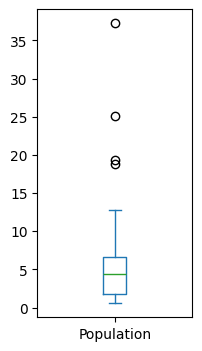

In [25]:
ax=(estado.Population/1000000).plot.box(figsize=(2,4))


In [29]:
binnedpopulation=pd.cut(estado.Population,bins=10)
binnedpopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


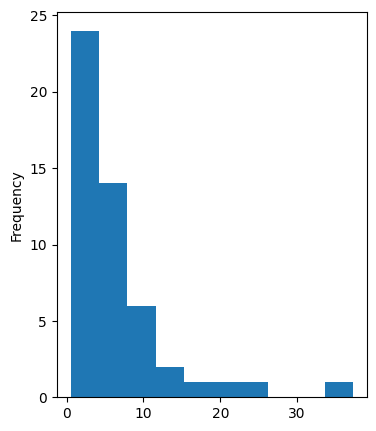

In [30]:
ax=(estado.Population/1000000).plot.hist(figsize=(4,5))
ax.set_label("Población en millones")

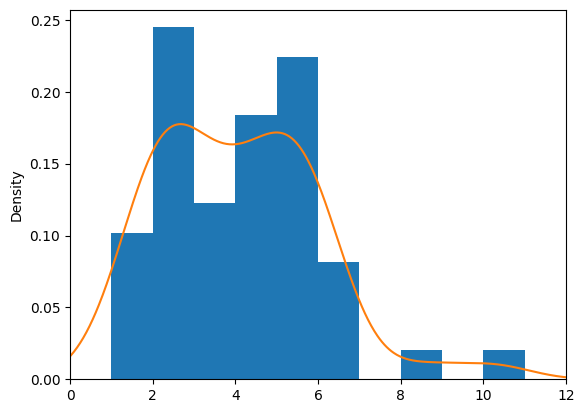

In [31]:
ax=estado["Murder.Rate"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
estado["Murder.Rate"].plot.density(ax=ax)
ax.set_label("Tasa de asesinato por 1M")

#EJERCICIOS DATASET

In [33]:
portfolio= pd.read_csv('/content/drive/MyDrive/clases ciencia de datos 2025/portfolio.csv')

In [37]:
print('-------info--------')
print(portfolio.info)
print('-------head--------')
print(portfolio.head())
print('-------describe--------')
print(portfolio.describe())

-------info--------
<bound method DataFrame.info of      portfolio_id investment_name  purchase_price  sale_price     profit  \
0               1              Dr       440060.34     2427.57 -437632.77   
1               2             Rev       324276.57   496112.45  171835.88   
2               3              Mr       527782.12   904167.86  376385.74   
3               4             Mrs       652605.00   249840.06 -402764.94   
4               5             Rev       975346.41   665086.37 -310260.04   
..            ...             ...             ...         ...        ...   
995           996             Rev        23231.89   808926.82  785694.93   
996           997              Mr       970203.16   215245.17 -754957.99   
997           998              Dr       441711.36   934384.48  492673.12   
998           999              Mr       838687.58   594730.77 -243956.81   
999          1000              Mr       176618.36   934065.48  757447.12   

    investment_type investment_date

In [36]:
profit_by_sector = portfolio.groupby('investment_sector')['profit'].max()
print(profit_by_sector)
#representa el portafolio mas rentable de cada sector

investment_sector
Finance       904668.14
Healthcare    928403.86
Technology    928275.97
Name: profit, dtype: float64


In [38]:
portfolio.profit.std()

408547.2696640361

In [39]:
portfolio.profit.quantile(0.75)-portfolio.profit.quantile(0.25)

np.float64(584984.655)

In [40]:
robust.mad(portfolio.profit)


np.float64(426046.7188959654)

In [47]:
portfolio=portfolio.rename(columns={'profit':'ganancia','investment_sector':'sector de inversion'})
portfolio

,portfolio_id,investment_name,purchase_price,sale_price,ganancia,investment_type,investment_date,investment_duration,risk_level,sector de inversion
0,1,Dr,440060.34,2427.57,-437632.77,Real Estate,6/23/2005,13,Low,Finance
1,2,Rev,324276.57,496112.45,171835.88,Real Estate,9/24/2020,18,Medium,Technology
2,3,Mr,527782.12,904167.86,376385.74,Stocks,6/3/2016,2,High,Technology
3,4,Mrs,652605.00,249840.06,-402764.94,Bonds,6/22/2011,42,Low,Finance
4,5,Rev,975346.41,665086.37,-310260.04,Bonds,10/21/2004,31,Medium,Healthcare
...,...,...,...,...,...,...,...,...,...,...
995,996,Rev,23231.89,808926.82,785694.93,Real Estate,1/31/2009,19,High,Healthcare
996,997,Mr,970203.16,215245.17,-754957.99,Bonds,12/27/2015,10,Low,Technology
997,998,Dr,441711.36,934384.48,492673.12,Bonds,10/28/2018,8,Low,Technology
998,999,Mr,838687.58,594730.77,-243956.81,Real Estate,1/21/2018,17,Low,Healthcare


In [49]:
portfolio.ganancia.quantile([0.05,0.25,0.5,0.75,0.95])
#el 5% de las ganancias son menores o iguales a -660606.7805
#el 25% de las ganancias son menores o iguales a -292811.6925
#el 50% de las ganancias son menores o iguales a 11957.0300
#el 75% de las ganancias son menores o iguales a 292172.9625
#el 95% de las ganancias son menores o iguales a 680161.2115
#se puede interpretar que el aproximadamente el 25% de los portafolios de inversion genera perdidas


,ganancia
0.05,-660606.7805
0.25,-292811.6925
0.50,11957.0300
0.75,292172.9625
0.95,680161.2115


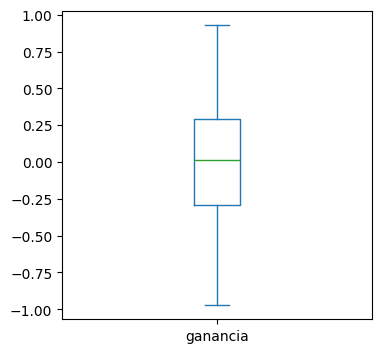

In [56]:
_AX=(portfolio.ganancia/1000000).plot.box(figsize=(4,4))
_AX.set_label('ganancias')

Text(0.5, 0, 'Ganancia ')

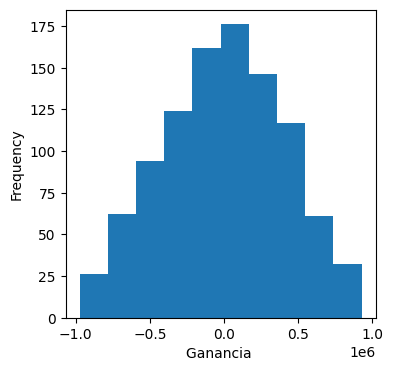

In [58]:
ax=(portfolio.ganancia).plot.hist(figsize=(4,4))
ax.set_xlabel("Ganancia ")

Text(0.5, 0, 'Ganancia')

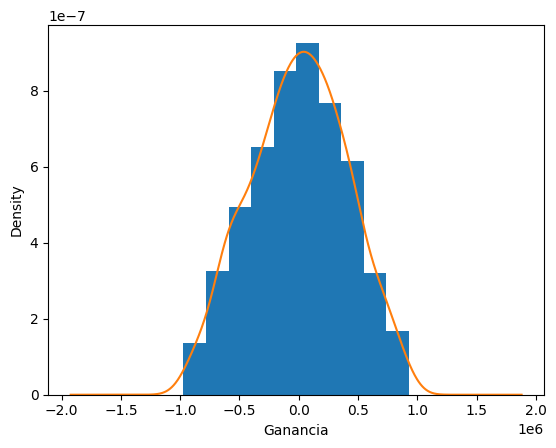

In [60]:
ax=portfolio["ganancia"].plot.hist(density=True)
portfolio["ganancia"].plot.density(ax=ax)
ax.set_xlabel("Ganancia")